In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
%matplotlib inline

In [17]:
class Drone2D:
    
    def __init__(self,
                 k_f=0.1,
                 m=1.0,
                 i_x=0.1,
                 l=0.5):
        
        self.k_f = k_f
        self.m = m
        self.i_x = i_x
        self.l = l
        
        self.omega1 = 0.0
        self.omega2 = 0.0
        self.g = 9.81
        
        # State vector
        
        self.X = np.array([0.0,0.0,0.0,0.0,0.0,0.0]) # y,z,phi,y_dot,z_dot,phi_dot
        
    def advance_state_uncontrolled(self,dt):
        
        '''
        Advances the state of an uncontrolled drone (i.e. the rotors aren't spinning)
        '''
        
        z_dot_dot = 9.81
        y_dot_dot = 0.0
        phi_dot_dot = 0.0
        y_dot = self.X[3]
        z_dot = self.X[4]
        phi_dot = self.X[5]
        X_dot = np.array([y_dot,z_dot,phi_dot,y_dot_dot,z_dot_dot,phi_dot_dot])
        
        delta_X = X_dot * dt
        
        self.X += delta_X
        
    def get_thrust_and_moment(self):
        '''
        Helper function that calculates and returns the total thrust and the moment.
        '''
        
        f1 = self.k_f*(self.omega1**2)
        f2 = self.k_f*(self.omega2**2)
        
        c = f1 + f2 # combined thrust
        M_x = (f1 - f2) * self.l
        
        return c,M_x
    
    @property
    def z_dot_dot(self):
        '''
        Calculates the net acceleration along the vertical direction.
        '''
        
        phi = self.X[2]
        c,m_x = self.get_thrust_and_moment()
        vert_acc = self.g - (c*math.cos(phi)/self.m)
        
        return vert_acc
    
    @property
    def y_dot_dot(self):
        '''
        Calculates the net lateral acceleration experienced by the drone.
        '''
        
        c,m_x = self.get_thrust_and_moment()
        phi = self.X[2]
        lat_acc = c*math.sin(phi)/self.m
        
        return lat_acc
    
    @property
    def phi_dot_dot(self):
        '''
        Calculates the net angular acceleration experienced by the drone.
        '''
        
        c,m_x = self.get_thrust_and_moment()
        ang_acc = m_x/self.i_x
        
        return ang_acc

### Verify trajectory of uncontrolled drone

Text(0,0.5,'Position Z-axis')

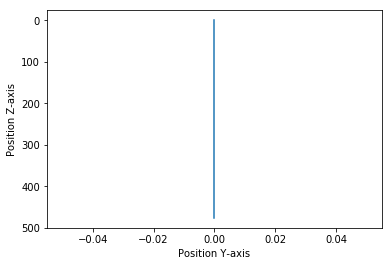

In [11]:
drone_uncontrolled = Drone2D()

Z_history = []
Y_history = []

dt = 0.1

for i in range(100):
    Z_history.append(drone_uncontrolled.X[1])
    Y_history.append(drone_uncontrolled.X[0])
    drone_uncontrolled.advance_state_uncontrolled(dt)
    
plt.plot(Y_history,Z_history)
plt.gca().invert_yaxis()
plt.xlabel("Position Y-axis")
plt.ylabel("Position Z-axis")
    
    


### Trajectory of the uncontrolled drone given an initial velocity along the Y-axis

In [12]:
uncontrolled_drone_vel = Drone2D()

uncontrolled_drone_vel.X[3] = 1.0

Z_history = []
Y_history = []
dt = 0.1

for i in range(100):
    Z_history.append(uncontrolled_drone_vel.X[1])
    Y_history.append(uncontrolled_drone_vel.X[0])
    uncontrolled_drone_vel.advance_state_uncontrolled(dt)
    

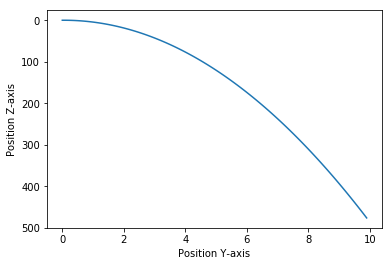

In [13]:
plt.plot(Y_history,Z_history)
plt.xlabel("Position Y-axis")
plt.ylabel("Position Z-axis")
plt.gca().invert_yaxis()